# Creación de dataset y cargas de librerias


In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Base/habitos_digitales_profesionales_TI.csv', encoding='latin1')

data.head()


,id,edad,genero,pais,anios_experiencia,horas_trabajo_diario,horas_sueÃ±o,uso_redes_horas,pausas_activas,nivel_estres,satisfaccion_laboral,tareas_completadas,salario_mensual_usd,area
0,1,58,Femenino,EspaÃ±a,10,8.2,8.1,2.9,6,5,8,4.0,4485,IA
1,2,48,Masculino,Colombia,13,6.3,4.9,5.1,1,7,4,8.0,1431,Soporte
2,3,34,Femenino,Colombia,22,10.6,4.2,2.3,3,8,3,4.1,3256,Soporte
3,4,27,Otro,Chile,15,8.5,5.0,1.0,0,7,4,9.1,1781,Soporte
4,5,40,Otro,MÃ©xico,0,10.9,5.7,5.0,2,9,5,9.1,2356,Desarrollo


# Primeros pasos
Analsis Exploratorio del dataset

In [75]:
# Informacion general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   edad                  1000 non-null   int64  
 2   genero                1000 non-null   object 
 3   pais                  1000 non-null   object 
 4   anios_experiencia     1000 non-null   int64  
 5   horas_trabajo_diario  1000 non-null   float64
 6   horas_sueÃ±o          1000 non-null   float64
 7   uso_redes_horas       1000 non-null   float64
 8   pausas_activas        1000 non-null   int64  
 9   nivel_estres          1000 non-null   int64  
 10  satisfaccion_laboral  1000 non-null   int64  
 11  tareas_completadas    1000 non-null   float64
 12  salario_mensual_usd   1000 non-null   int64  
 13  area                  1000 non-null   object 
dtypes: float64(4), int64(7), object(3)
memory usage: 109.5+ KB


In [18]:
# Estadisticas descriptivas
data.describe()

,id,edad,anios_experiencia,horas_trabajo_diario,horas_sueÃ±o,uso_redes_horas,pausas_activas,nivel_estres,satisfaccion_laboral,tareas_completadas,salario_mensual_usd
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,14.620000,8.987700,6.457800,2.964500,3.332000,5.568000,5.440000,5.834700,2840.444000
std,288.819436,11.780055,8.703525,1.727994,1.432044,1.731609,2.301972,2.933595,2.973759,2.274546,1192.930914
min,1.000000,20.000000,0.000000,6.000000,4.000000,0.000000,0.000000,1.000000,1.000000,2.000000,802.000000
25%,250.750000,30.000000,7.000000,7.500000,5.200000,1.500000,1.000000,3.000000,3.000000,3.900000,1777.250000
50%,500.500000,41.000000,15.000000,9.000000,6.500000,2.900000,3.000000,6.000000,5.000000,5.650000,2761.500000
75%,750.250000,50.250000,22.000000,10.500000,7.700000,4.425000,5.000000,8.000000,8.000000,7.700000,3899.250000
max,1000.000000,59.000000,29.000000,12.000000,9.000000,6.000000,7.000000,10.000000,10.000000,10.000000,4999.000000


In [20]:
# Revisión de valores nulos
data.isnull().sum()

id                      0
edad                    0
genero                  0
pais                    0
anios_experiencia       0
horas_trabajo_diario    0
horas_sueÃ±o            0
uso_redes_horas         0
pausas_activas          0
nivel_estres            0
satisfaccion_laboral    0
tareas_completadas      0
salario_mensual_usd     0
area                    0
dtype: int64

#### Analisis de sueldo promedio por edad


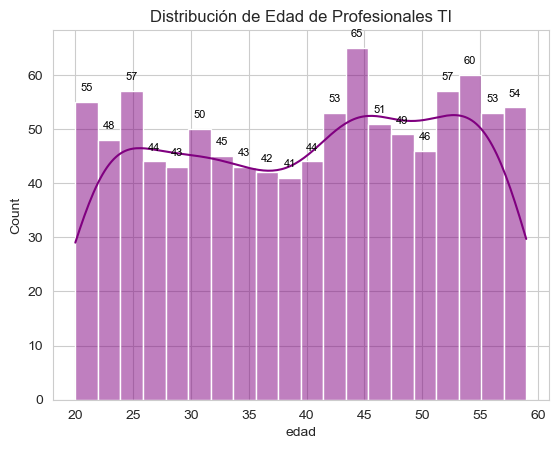

In [76]:

ax = sns.histplot(data=data, x='edad',binwidth=2, kde=True, color='purple' )
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,#alineación horizontal
            p.get_height() + 2, #alineación vertical
            f"{p.get_height():.0f}",
            ha='center', fontsize=8, color='black')
plt.title('Distribución de Edad de Profesionales TI')
plt.show()


##### Validación del rango de  edad

In [80]:
data[['edad','rango_edad']].head(15)

,edad,rango_edad
0,58,55-60
1,48,45-50
2,34,30-35
3,27,25-30
4,40,35-40
5,58,55-60
6,38,35-40
7,42,40-45
8,30,25-30
9,30,25-30


In [79]:
#Agregar columna de rango de edad
data['rango_edad'] = pd.cut(data['edad'], bins=[0, 20, 25, 30,35, 40,45, 50,55,60],
                          labels=['18-20', '20-25', '25-30', '30-35', '35-40','40-45','45-50','50-55','55-60'])

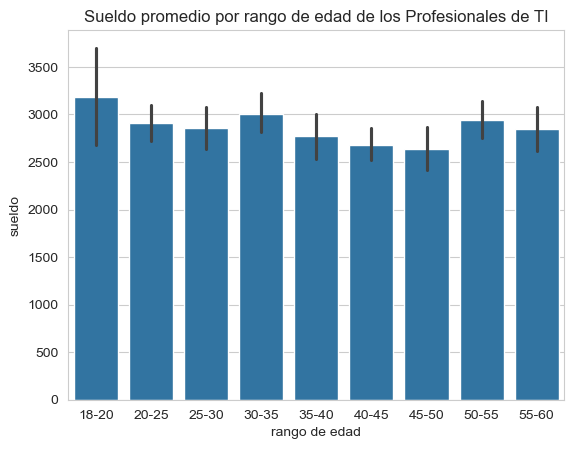

In [78]:
sns.barplot(data=data, x='rango_edad',y='salario_mensual_usd' )
plt.title('Sueldo promedio por rango de edad de los Profesionales de TI')
plt.xlabel("rango de edad")
plt.ylabel("sueldo")
plt.show()